Slope (m): 0.6
Intercept (c): 2.2


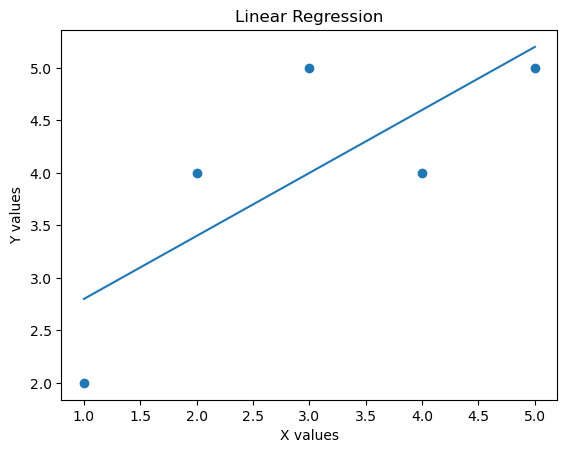

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Input data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Number of data points
n = len(x)

# Calculate mean
mean_x = np.mean(x)
mean_y = np.mean(y)

# Calculate slope (m)
numerator = 0
denominator = 0

for i in range(n):
    numerator = numerator + (x[i] - mean_x) * (y[i] - mean_y)
    denominator = denominator + (x[i] - mean_x) ** 2

m = numerator / denominator

# Calculate intercept (c)
c = mean_y - (m * mean_x)

print("Slope (m):", m)
print("Intercept (c):", c)

# Predicted values
y_pred = []

for i in range(n):
    y_pred.append(m * x[i] + c)

# Plot
plt.scatter(x, y)
plt.plot(x, y_pred)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Linear Regression")
plt.show()

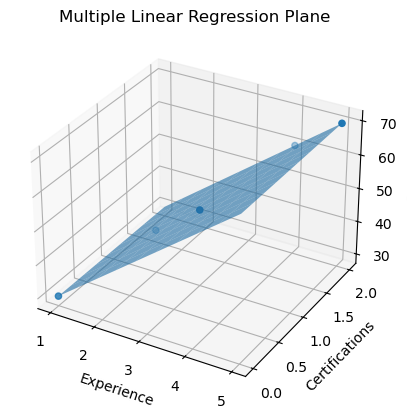

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data
x1 = np.array([1, 2, 3, 4, 5])
x2 = np.array([0, 1, 1, 2, 2])
y  = np.array([30, 40, 50, 60, 70])

# Create X matrix
X = np.column_stack((np.ones(len(x1)), x1, x2))

# Normal equation
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

b0, b1, b2 = beta

# Create grid
x1_grid, x2_grid = np.meshgrid(
    np.linspace(min(x1), max(x1), 10),
    np.linspace(min(x2), max(x2), 10)
)

y_grid = b0 + b1*x1_grid + b2*x2_grid

# Plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, y)
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.6)

ax.set_xlabel("Experience")
ax.set_ylabel("Certifications")
ax.set_zlabel("Salary")
ax.set_title("Multiple Linear Regression Plane")

plt.show()

b0 = -5.690294412813251
b1 = 1.7036105175157013


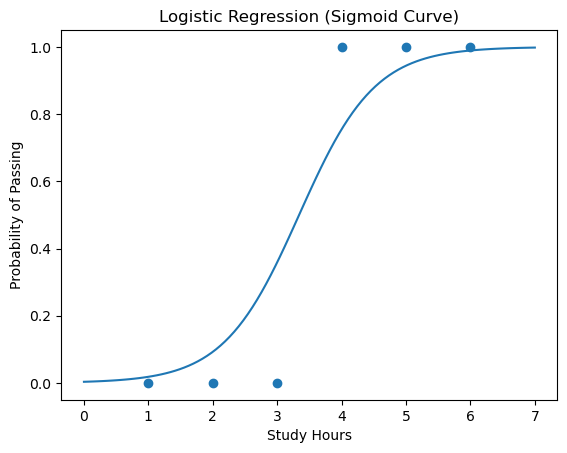

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Input data
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([0, 0, 0, 1, 1, 1])

# Initialize parameters
b0 = 0
b1 = 0
learning_rate = 0.1
epochs = 1000

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Training using gradient descent
for i in range(epochs):
    z = b0 + b1 * x
    y_pred = sigmoid(z)

    db0 = np.mean(y_pred - y)
    db1 = np.mean((y_pred - y) * x)

    b0 = b0 - learning_rate * db0
    b1 = b1 - learning_rate * db1

print("b0 =", b0)
print("b1 =", b1)

# Prediction curve
x_line = np.linspace(0, 7, 100)
y_line = sigmoid(b0 + b1 * x_line)

# Plot
plt.scatter(x, y)
plt.plot(x_line, y_line)
plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression (Sigmoid Curve)")
plt.show()


✅ Classification vs Regression Comparison
                      Model            Type     Score
0       Logistic Regression  Classification  1.000000
1            KNN Classifier  Classification  1.000000
2  Decision Tree Classifier  Classification  1.000000
3         Linear Regression      Regression  0.452603
4             KNN Regressor      Regression  0.430164
5   Decision Tree Regressor      Regression  0.043578


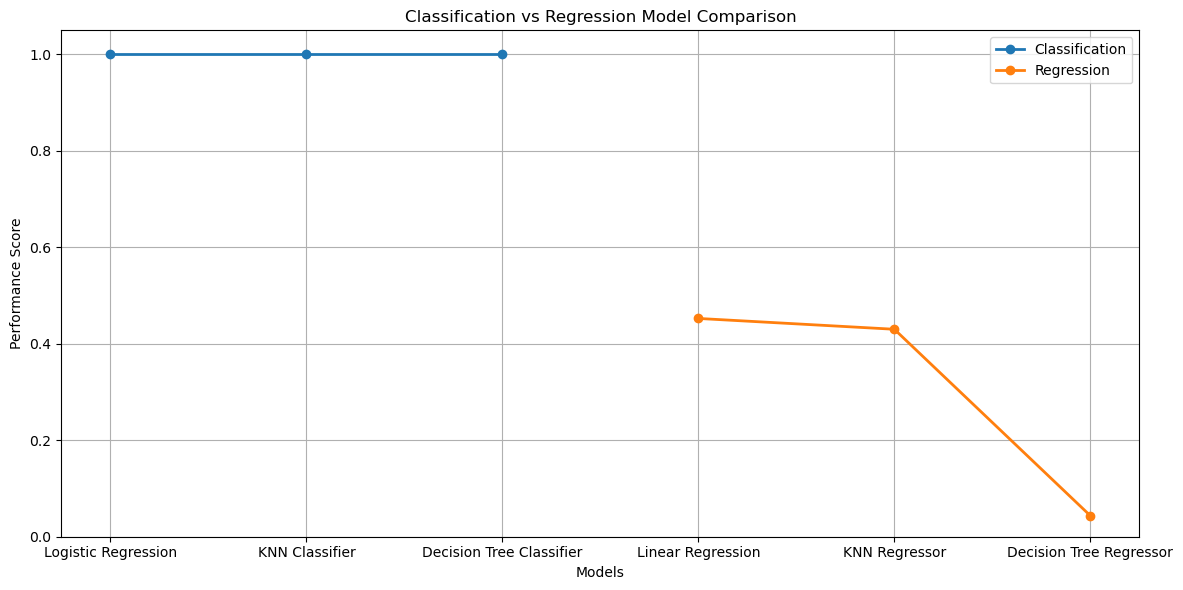

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# =====================================================
# PART 1: CLASSIFICATION
# =====================================================

iris = load_iris()
Xc, yc = iris.data, iris.target

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    Xc, yc, test_size=0.2, random_state=42
)

class_models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

class_results = []

for name, model in class_models.items():
    model.fit(Xc_train, yc_train)
    pred = model.predict(Xc_test)

    acc = accuracy_score(yc_test, pred)

    class_results.append({
        "Model": name,
        "Type": "Classification",
        "Score": acc
    })


# =====================================================
# PART 2: REGRESSION
# =====================================================

diabetes = load_diabetes()
Xr, yr = diabetes.data, diabetes.target

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    Xr, yr, test_size=0.2, random_state=42
)

reg_models = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor()
}

reg_results = []

for name, model in reg_models.items():
    model.fit(Xr_train, yr_train)
    pred = model.predict(Xr_test)

    r2 = r2_score(yr_test, pred)

    reg_results.append({
        "Model": name,
        "Type": "Regression",
        "Score": r2
    })


# =====================================================
# PART 3: COMPARISON DATAFRAME
# =====================================================

final_df = pd.DataFrame(class_results + reg_results)

print("\n✅ Classification vs Regression Comparison")
print(final_df)


# =====================================================
# PART 4: GRAPH
# =====================================================

plt.figure(figsize=(12, 6))

for model_type in final_df["Type"].unique():
    subset = final_df[final_df["Type"] == model_type]

    plt.plot(
        subset["Model"],
        subset["Score"],
        marker="o",
        linewidth=2,
        label=model_type
    )

plt.title("Classification vs Regression Model Comparison")
plt.xlabel("Models")
plt.ylabel("Performance Score")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

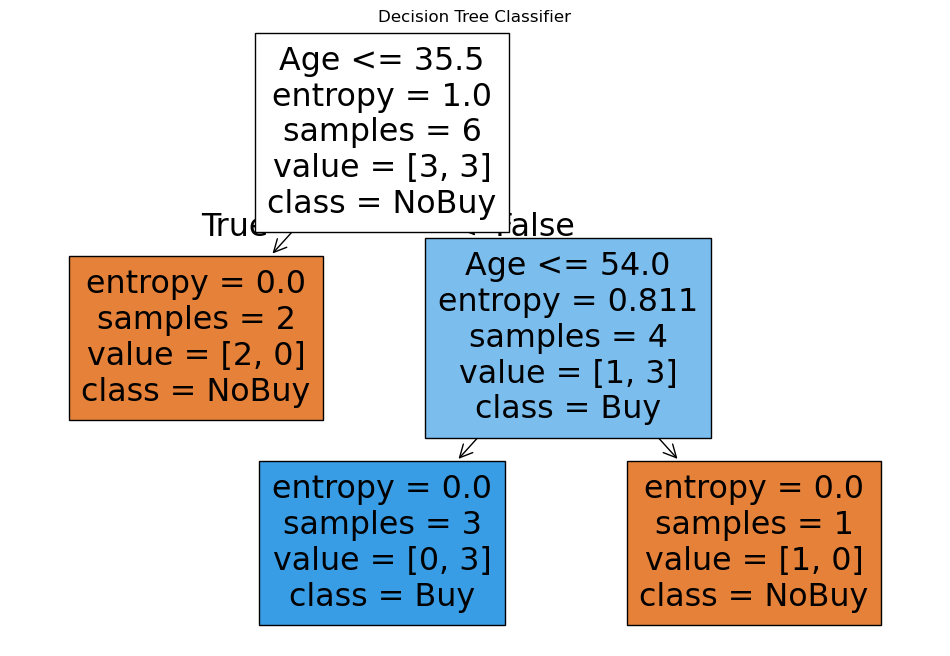

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Dataset
X = [
    [22, 1],
    [25, 1],
    [47, 0],
    [52, 0],
    [46, 1],
    [56, 0]
]

y = [0, 0, 1, 1, 1, 0]

# Model
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X, y)

# Plot tree
plt.figure(figsize=(12, 8))
plot_tree(
    model,
    feature_names=["Age", "Student"],
    class_names=["NoBuy", "Buy"],
    filled=True
)

plt.title("Decision Tree Classifier")
plt.show()

Predicted class: 1


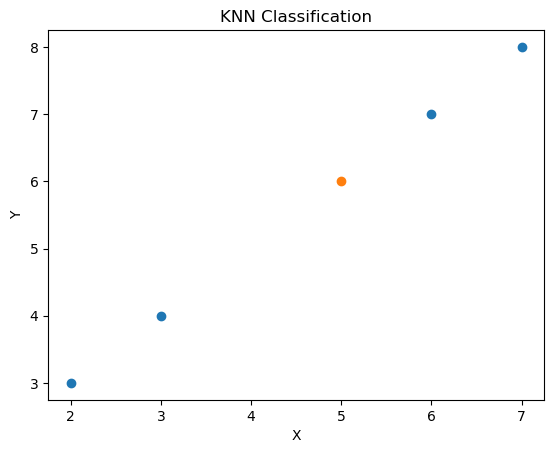

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
X = np.array([[2,3], [3,4], [6,7], [7,8]])
y = np.array([0, 0, 1, 1])   # 0 = A, 1 = B

# New point
new_point = np.array([5,6])

# Euclidean distance
distances = []

for i in range(len(X)):
    d = np.sqrt((X[i][0]-new_point[0])**2 + (X[i][1]-new_point[1])**2)
    distances.append(d)

# Get K nearest neighbors
K = 3
nearest_indices = np.argsort(distances)[:K]

# Majority voting
votes = []

for i in nearest_indices:
    votes.append(y[i])

prediction = max(set(votes), key=votes.count)

print("Predicted class:", prediction)

# Plot
plt.scatter(X[:,0], X[:,1])
plt.scatter(new_point[0], new_point[1])
plt.title("KNN Classification")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Slope = 0.8137325572753406
Intercept = 1.7504211109191932


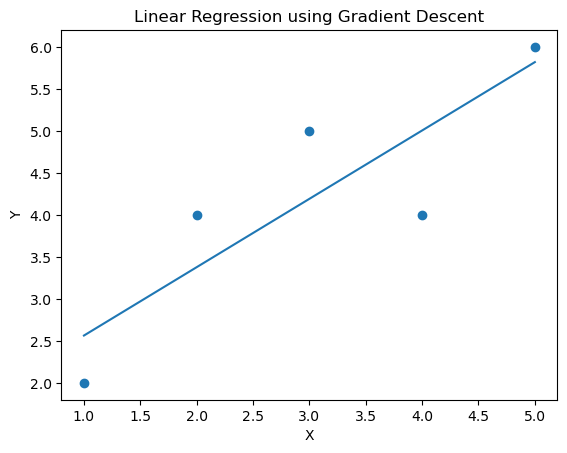

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 6])

# Initialize
m = 0
c = 0
alpha = 0.01
epochs = 1000
n = len(x)

# Gradient Descent
for i in range(epochs):
    y_pred = m * x + c

    dm = (-2/n) * sum(x * (y - y_pred))
    dc = (-2/n) * sum(y - y_pred)

    m = m - alpha * dm
    c = c - alpha * dc

print("Slope =", m)
print("Intercept =", c)

# Plot
plt.scatter(x, y)
plt.plot(x, m*x + c)
plt.title("Linear Regression using Gradient Descent")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()